In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# 1. Прочитайте CSV файл
file_path = 'Global YouTube Statistics.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [16]:
# 2. Виведіть перші п'ять рядків
print(df.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [17]:
# 3. Виведіть розміри датасету, перевірте наявність пропусків, дублікатів
print(f"Розмір датасету: {df.shape}")
print(f"Пропуски:\n{df.isnull().sum()}")
print(f"Дублікати: {df.duplicated().sum()}")

Розмір датасету: (995, 28)
Пропуски:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month          

In [27]:
# 4. Якщо є пропуски, замініть тип даних на float і середнє значення за стовпцем
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()) if np.issubdtype(x.dtype, np.number) else x)

non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna('Unknown')

In [28]:
# 5. Ще раз перевірте кількість пропусків
print(f"Пропуски після заповнення:\n{df.isnull().sum()}")

Пропуски після заповнення:
rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                

In [29]:
# 6. Перевірте, скільки унікальних країн представлено у колонці "Country"
unique_countries = df['Country'].nunique()
print(f"Унікальні країни: {unique_countries}")

Унікальні країни: 50


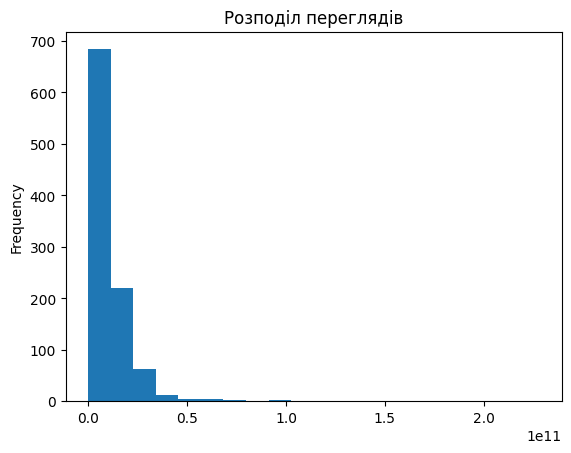

In [33]:
df['video views'].plot(kind='hist', bins=20, title='Розподіл переглядів')
plt.show()

In [36]:
print(f"Максимальна кількість переглядів: {df['video views'].max()}")
print(f"Мінімальна кількість переглядів: {df['video views'].min()}")
print(f"Середня кількість переглядів: {df['video views'].mean()}")

Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


In [38]:
# 9. Знайдіть країну, де найбільше відео було завантажено на YouTube
most_uploaded_country = df.loc[df['uploads'].idxmax(), 'Country']
print(f"Країна з найбільшою кількістю завантажень: {most_uploaded_country}")

Країна з найбільшою кількістю завантажень: India


In [41]:
# 10. Знайдіть відео з найбільшою та найменшою кількістю завантажень
max_uploads_video = df.loc[df['uploads'].idxmax(), 'Title']
min_uploads_video = df.loc[df['uploads'].idxmin(), 'Title']
print(f"Відео з найбільшою кількістю завантажень: {max_uploads_video}")
print(f"Відео з найменшою кількістю завантажень: {min_uploads_video}")

Відео з найбільшою кількістю завантажень: ABP NEWS
Відео з найменшою кількістю завантажень: Music
